### K-Means Clustering

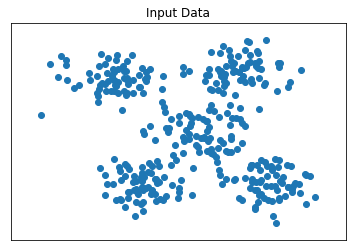

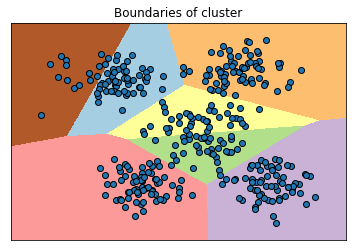

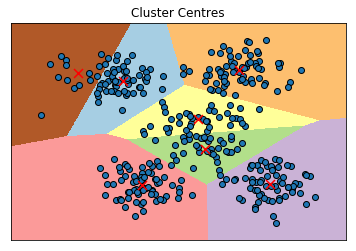

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
x=np.loadtxt('data_clustering.txt',delimiter=',')
no_cluster=7
plt.figure()
plt.scatter(x[:,0],x[:,1])
xmin,xmax=x[:,0].min()-1,x[:,0].max()+1
ymin,ymax=x[:,1].min()-1,x[:,1].max()+1
plt.title('Input Data')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.xticks(())
plt.yticks(())
kmeans=KMeans(init='k-means++',n_clusters=no_cluster,n_init=10).fit(x)   #Creating K-Means Object
stepSize=0.01
xvals,yvals=np.meshgrid(np.arange(xmin,xmax,stepSize),np.arange(ymin,ymax,stepSize))
op=kmeans.predict(np.c_[xvals.ravel(),yvals.ravel()])
op=op.reshape(xvals.shape)
plt.figure()
plt.clf()
plt.imshow(op,interpolation='nearest',extent=(xvals.min(),xvals.max(),yvals.min(),yvals.max()),cmap=plt.cm.Paired,aspect='auto',origin='lower')
plt.scatter(x[:,0],x[:,1],edgecolor='black')
plt.title('Boundaries of cluster')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.xticks(())
plt.yticks(())
plt.show()
cluster_centre=kmeans.cluster_centers_
plt.imshow(op,interpolation='nearest',extent=(xvals.min(),xvals.max(),yvals.min(),yvals.max()),cmap=plt.cm.Paired,aspect='auto',origin='lower')
plt.scatter(x[:,0],x[:,1],edgecolor='black')
plt.scatter(cluster_centre[:,0],cluster_centre[:,1],color='black',marker='x',s=80,facecolor='red')
plt.title('Cluster Centres')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.xticks(())
plt.yticks(())
plt.show()

In [2]:
pwd

'C:\\Users\\16BIS0178'

In [3]:
cd Downloads

C:\Users\16BIS0178\Downloads


In [4]:
pwd

'C:\\Users\\16BIS0178\\Downloads'

In [5]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 5AD0-4211

 Directory of C:\Users\16BIS0178\Downloads

09/11/2019  02:29 PM    <DIR>          .
09/11/2019  02:29 PM    <DIR>          ..
09/11/2019  02:29 PM             3,431 data_clustering.txt
               1 File(s)          3,431 bytes
               2 Dir(s)  40,419,971,072 bytes free


### MeanShift Algorithm


 Number of Clusters in input data =  4


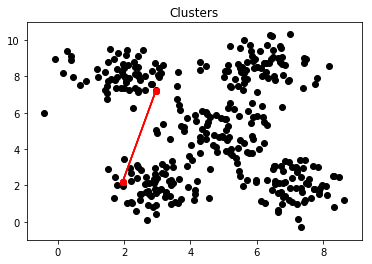

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

x=np.loadtxt('data_clustering.txt',delimiter=',')
bandwidth_x=estimate_bandwidth(x,quantile=0.2,n_samples=len(x))
meanshift_model=MeanShift(bandwidth=bandwidth_x,bin_seeding=True).fit(x)
labels=meanshift_model.labels_
cluster_center=meanshift_model.cluster_centers_
no_cluster=len(np.unique(labels))
print("\n Number of Clusters in input data = ",no_cluster)
plt.figure()
#markers='o*xvs'
markers = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for i,marker in zip(range(no_cluster),markers):
    plt.scatter(x[labels==i,0],x[labels==i,1],color='black')
    cluster_centers=cluster_center[i]
    plt.plot(cluster_centre[0],cluster_centre[1],marker='o',color='red')
plt.title('Clusters')
plt.show()

In [57]:
cluster_center

1.9577586206896547